# Validation Shape Bias

In [1]:
import matplotlib.pyplot as plt
import seaborn

import util.util_validation as ut_val

seaborn.set_style("darkgrid")

In [2]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", "animals10_diff_-1"],
               "CE_orig_small": ["./save/SupCE/animals10_diff_-1_small/SupCE_animals10_diff_-1_small_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_origSmall_cosine/models/last.pth", None],
               "CE_diffused": ["./save/SupCE/animals10_diff_4000/SupCE_animals10_diff_4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000_cosine/models/last.pth", "animals10_diff_4000"],
               "SupCon_try2": ["./save/SupCon/animals10/SupCon_animals10_resnet18_lr_0.5_decay_0.0001_bsz_26_temp_0.1_trial_0_try2_cosine/models/last.pth", "animals10_diff_-1"],
               "SupCon_diffusedNoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", "animals10_diff_-1"]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10/"

100%|██████████| 202/202 [00:59<00:00,  3.41it/s]


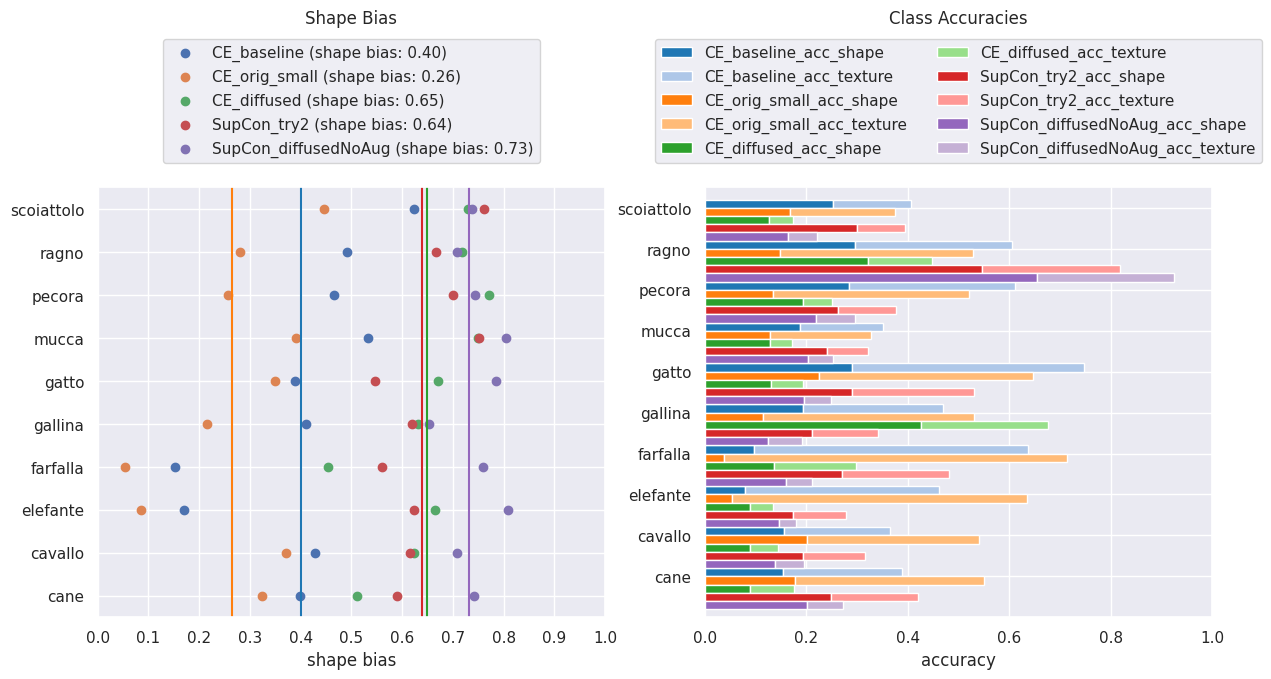

In [3]:
pred_dict, classes = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, ax=axs[1])